### Student Activity: Beta Comparisons

This program reads in the daily closing prices of social media stocks—FB, TWTR, SNAP—and the S&P 500 as CSVs and calculates the rolling 30-day beta values of each social media to plot the trends in volatility relative to the market.

In [15]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSVs in as DataFrames

In [16]:
# Read the daily closing prices of FB, set the `date` as a datetime index
fb_data = Path("fb_data.csv")
fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of TWTR, set the `date` as a datetime index
twtr_data = Path("twtr_data.csv")
twtr_df = pd.read_csv(twtr_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of SNAP, set the `date` as a datetime index
snap_data = Path("snap_data.csv")
snap_df = pd.read_csv(snap_data, index_col="date", parse_dates=True, infer_datetime_format=True)

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date", parse_dates=True, infer_datetime_format=True)
sp500_df.head()

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_44865/4119446508.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_44865/4119446508.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fb_df = pd.read_csv(fb_data, index_col="date", parse_dates=True, infer_datetime_format=True)
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_44865/4119446508.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034


### Combine DataFrames, Sort Index, and Rename Columns

In [17]:
# Create a new pivot table where the columns are the closing prices for each ticker
joined_df = pd.concat([fb_df, twtr_df, snap_df, sp500_df], axis='columns', join='inner')

# Sort datetime index in ascending order (past to present)
joined_df.sort_index(inplace=True)

# Set column names to 'FB' 'TWTR', 'SNAP', and 'S&P 500'
joined_df.columns = ['Facebook', 'Twitter', 'Snap Inc.', 'Standard & Poor\'s 500']

# Display a few rows
joined_df.head()

,Facebook,Twitter,Snap Inc.,Standard & Poor's 500
date,,,,
2017-03-02,136.76,15.79,24.48,2381.919922
2017-03-03,137.17,15.75,27.09,2383.120117
2017-03-06,137.42,15.56,23.77,2375.310059
2017-03-07,137.30,15.18,21.44,2368.389893
2017-03-08,137.72,15.24,22.81,2362.979980


### Calculate Daily Returns

In [18]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = joined_df.pct_change()
daily_returns

,Facebook,Twitter,Snap Inc.,Standard & Poor's 500
date,,,,
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,0.002998,-0.002533,0.106618,0.000504
2017-03-06,0.001823,-0.012063,-0.122554,-0.003277
2017-03-07,-0.000873,-0.024422,-0.098023,-0.002913
2017-03-08,0.003059,0.003953,0.063899,-0.002284
...,...,...,...,...
2019-05-13,-0.036105,-0.048375,-0.036225,-0.024131
2019-05-14,-0.004462,0.009292,0.037587,0.008016
2019-05-15,0.030653,0.026266,0.016206,0.005839


### Calculate Covariance of Social Media Stock Returns vs. S&P 500 Returns

In [19]:
# Calculate covariance of all daily returns of social media stocks vs. S&P 500
facebook_covariance = daily_returns['Facebook'].cov(daily_returns['Standard & Poor\'s 500'])
twitter_covariance = daily_returns['Twitter'].cov(daily_returns['Standard & Poor\'s 500'])
snap_inc_covariance = daily_returns['Snap Inc.'].cov(daily_returns['Standard & Poor\'s 500'])
facebook_covariance, twitter_covariance, snap_inc_covariance

(8.971694582778611e-05, 0.00010569463221453392, 7.7690874304962e-05)

### Calculate Variance of S&P 500 Returns

In [20]:
# Calculate variance of all daily returns of social media stocks vs. S&P 500
variance = daily_returns['Standard & Poor\'s 500'].var()
variance

7.00079617330316e-05

### Calculate Beta Values of Social Media Stocks

In [21]:
# Calculate beta of all daily returns of social media stocks
facebook_beta = facebook_covariance/variance
twitter_beta = twitter_covariance/variance
snap_inc_beta = snap_inc_covariance/variance
facebook_beta, twitter_beta, snap_inc_beta

(1.2815248952670948, 1.509751599647907, 1.1097434117740554)

### Calculate 30-Day Rolling Betas of AMZN Returns vs. S&P 500 Returns

<Axes: title={'center': 'Rolling 30-Day Beta of facebook'}, xlabel='date'>

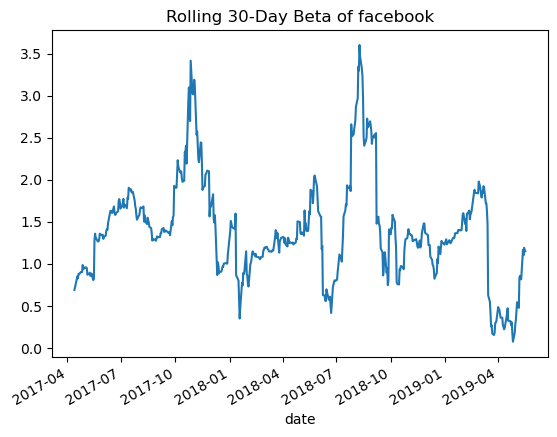

In [25]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
# Facebook
facebook_rolling_covariance = daily_returns['Facebook'].rolling(window=30).cov(daily_returns['Standard & Poor\'s 500'])
twitter_rolling_covariance = daily_returns['Twitter'].rolling(window=30).cov(daily_returns['Standard & Poor\'s 500'])
snap_inc_rolling_covariance = daily_returns['Snap Inc.'].rolling(window=30).cov(daily_returns['Standard & Poor\'s 500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = daily_returns['Standard & Poor\'s 500'].rolling(window=30).var()

# Calculate 30-day rolling beta of AMZN and plot the data
facebook_rolling_beta = facebook_rolling_covariance/rolling_variance
twitter_rolling_beta = twitter_rolling_covariance/rolling_variance
snap_inc_rolling_beta = snap_inc_rolling_covariance/rolling_variance
facebook_rolling_beta.plot(title='Rolling 30-Day Beta of facebook')

### Plot Rolling 30-Day Betas of Social Media Stocks

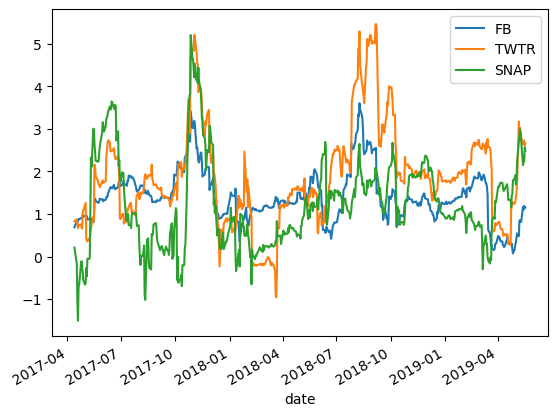

In [27]:
# Set the figure and plot the different datasets as multiple trends on the same figure
# Overlay FB, TWTR, and SNAP on the same figure
ax = facebook_rolling_beta.plot()
twitter_rolling_beta.plot(ax=ax)
snap_inc_rolling_beta.plot(ax=ax)


# Set the legend of the figure
ax.legend(['FB', 'TWTR', 'SNAP'])


In [ ]:
# Look into factor investing and how you get compensated 